In [1]:
import pandas as pd
import seaborn as sns
from langdetect import detect
import datetime

In [2]:
# read the dataset and drop Nan values from it
comments_df = pd.read_csv('trump_pennsylvania_comments.csv',engine='python')
print(comments_df.shape)
comments_df.dropna(inplace=True)
print(comments_df.shape)

(5746, 6)
(5728, 6)


In [3]:
comments_df.head()

,video_id,video_title,comment_id,comment_date,comment,like_count
0,xWrtgnCTmj4,Trump delivers remarks in Pennsylvania,Ugw-_qckxbOHF47Qzp14AaABAg,2021-01-25T15:08:59Z,A true great president!,1.0
1,xWrtgnCTmj4,Trump delivers remarks in Pennsylvania,UgwhdHVTiioGpOgzMLN4AaABAg,2021-01-25T10:14:26Z,I wonder what YouTube is going to do with this...,1.0
2,xWrtgnCTmj4,Trump delivers remarks in Pennsylvania,UgzUCVagqt-mc2kbVV14AaABAg,2021-01-24T10:57:46Z,Is the white house now a old peoples home and ...,0.0
3,xWrtgnCTmj4,Trump delivers remarks in Pennsylvania,Ugwo2zs4vM4b0hIBjQB4AaABAg,2021-01-24T02:21:26Z,Que Viva el Precidente Donald Trump,0.0
4,xWrtgnCTmj4,Trump delivers remarks in Pennsylvania,UgycWm2xyra1ujflf3x4AaABAg,2021-01-23T19:40:28Z,80% people love TRUMP AMERICA FIST,0.0


## Remove Emojis

In [4]:
import demoji
demoji.download_codes()

... OK (Got response in 1.17 seconds)
Writing emoji data to /Users/hasannamli/.demoji/codes.json ...
... OK


In [9]:
comments_df["clean_comments"] = comments_df["comment"].apply(lambda x: demoji.replace(x,""))

## Language Detection

In [10]:
from langdetect import detect

comments_df["lan"] = 0

count = 0
for i in range(0,len(comments_df)):
    temp = comments_df["clean_comments"].iloc[i]
    count += 1
    try:
        comments_df["lan"].iloc[i] = detect(temp)
    except:
        comments_df["lan"].iloc[i] = "no_lan"

In [11]:
# filter only english text
comments_df = comments_df[comments_df["lan"] == "en"]

## Remove Special Characters with Regex

In [12]:
regex = r"[^A-Za-z'\t]"
import re

In [13]:
comments_df["reg"] = comments_df["clean_comments"].apply(lambda x:re.findall(regex,x))
comments_df["regular_comments"] = comments_df["clean_comments"].apply(lambda x:re.sub(regex," ",x))

In [14]:
comments_df = comments_df[["video_id","video_title","comment_date","regular_comments","like_count"]]

In [15]:
comments_df = comments_df.rename(columns = {"regular_comments":"comments"})


In [16]:
comments_df.shape

(4715, 5)

## Like Counts Analysis

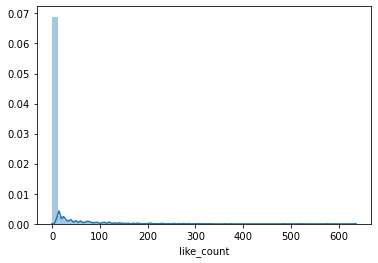

In [17]:
sns.distplot(comments_df['like_count'])

In [22]:
comments_df[comments_df['like_count'] >= 3].shape

(970, 5)

In [24]:
comments_df[(comments_df['like_count'] < 3) & (comments_df['like_count'] > 0)].shape

(1194, 5)

In [26]:
df = comments_df[comments_df['like_count'] > 0].copy()

In [27]:
def label_comments(x):
    if x[4] >= 3:
        return 1
    elif (x[4] < 3) and (x[4] > 0):
        return 0

In [28]:
# Label comments by the like size
# comments which has more than 3 likes labelled as 
# highly liked 
# comments which has less than 3 likes labelled as low liked 
df["label_highlow"] = df.apply(label_comments,axis=1) 

In [30]:
df.shape

(2164, 6)

In [33]:
df.to_csv("trump_pennsylvania_comments_fox.csv",index=False)